# KIAM8

## Task 3 - Model Explainability

Objective: Interpret your best model's predictions using SHAP to understand what drives fraud detection and provide actionable business recommendations.

In [1]:
# Add scripts path to the Environment
import os
import sys

cwd = os.getcwd()
scripts_path= os.path.join(cwd,'..','scripts')
scripts_abs_path = os.path.abspath(scripts_path)

if scripts_abs_path not in sys.path and os.path.isdir(scripts_abs_path):
    sys.path.append(scripts_abs_path)
    print('Scripts Path Added')
else:
    print('Scripts path doesnot exists or already added to system path')

Scripts Path Added


In [2]:
import model_explanations as mx
import modeling as md
import data_processing as dp
import pandas as pd
from sklearn.model_selection import train_test_split

c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load Data

df_credit_card =pd.read_csv('../data/processed/creditcard_cleaned.csv')
df_fraud_data = pd.read_csv('../data/processed/Fraud_Data_Enriched.csv')

df_credit_card.columns=df_credit_card.columns.str.lower()
df_fraud_data.columns=df_fraud_data.columns.str.lower()

In [4]:
# Feature Preparation

X_CreditCard,y_CreditCard,CreditCard_Features,CreditCard_Encoders  = dp.prepare_features(df_credit_card)

X_fraudData,y_fraudData,FraudData_Features,FraudData_Encoders  = dp.prepare_features(df_fraud_data)


FEATURE PREPARATION
Initial features: 30
Categorical features: 0
Numerical features: 30

Final feature matrix shape: (283726, 30)
Target distribution:
0    283253
1       473
Name: count, dtype: int64

FEATURE PREPARATION
Initial features: 6
Categorical features: 4
Numerical features: 2

Encoding categorical features: ['source', 'browser', 'sex', 'country']

Final feature matrix shape: (151112, 190)
Target distribution:
0    136961
1     14151
Name: count, dtype: int64


In [5]:
# Split Data into Train and Test Sets

X_train_creditCard, X_test_creditCard, y_train_creditCard, y_test_creditCard = train_test_split(X_CreditCard, y_CreditCard, test_size=0.2, random_state=42, stratify=y_CreditCard)
X_train_fraudData, X_test_fraudData, y_train_fraudData, y_test_fraudData = train_test_split(X_fraudData, y_fraudData, test_size=0.2, random_state=42, stratify=y_fraudData)

In [6]:
# APply SMOTE to Train Data for Both Credit Card & Fraud Data 

X_train_creditCard_smote,y_train_creditCard_smote=dp.handle_imbalance_smote(X_train_creditCard,y_train_creditCard)
X_train_fraudData_smote,y_train_fraudData_smote = dp.handle_imbalance_smote(X_train_fraudData,y_train_fraudData)


HANDLING CLASS IMBALANCE - SMOTE
Original class distribution:
  Class 0 (Legitimate): 226602
  Class 1 (Fraud): 378
  Ratio: 599.48:1

Resampled class distribution:
  Class 0 (Legitimate): 226602
  Class 1 (Fraud): 113301
  Ratio: 2.00:1

HANDLING CLASS IMBALANCE - SMOTE
Original class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 11321
  Ratio: 9.68:1

Resampled class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 54784
  Ratio: 2.00:1


## Based on the Modleing Step, we've selected the below two models as best performing 

* For Credit Card Fraud Detection 

    * Random Forest Model

* For Fraud Data Detection

    * Random Forest Model with SMOTE

In [7]:

# Import Model paths

path_credit_card_model ='../models/model_creditCard_rand_forest.pkl'
path_fraud_data_model ='../models/model_fraudData_rand_forest_SMOTE.pkl'


In [8]:
import joblib

model_fraud_data = joblib.load(path_fraud_data_model)
model_credit_card = joblib.load(path_credit_card_model)

[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



FEATURE IMPORTANCE ANALYSIS: Fraud Data Model



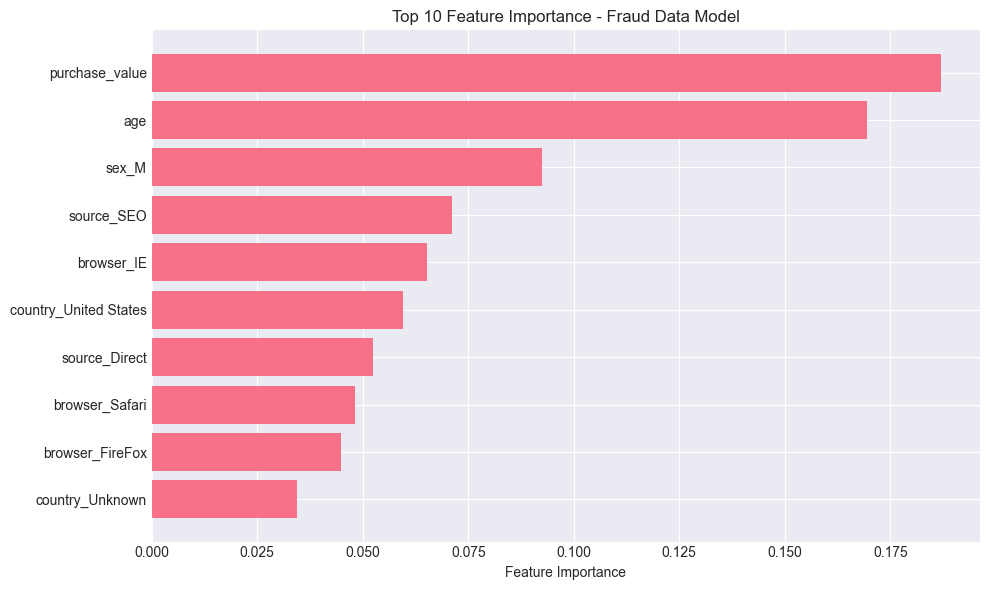


Computing SHAP values for Fraud Data Model...


100%|===================| 60434/60446 [37:47<00:00]        

SHAP values computed successfully! Shape: (30223, 190)

Generating SHAP Summary Plot for Fraud Data Model...


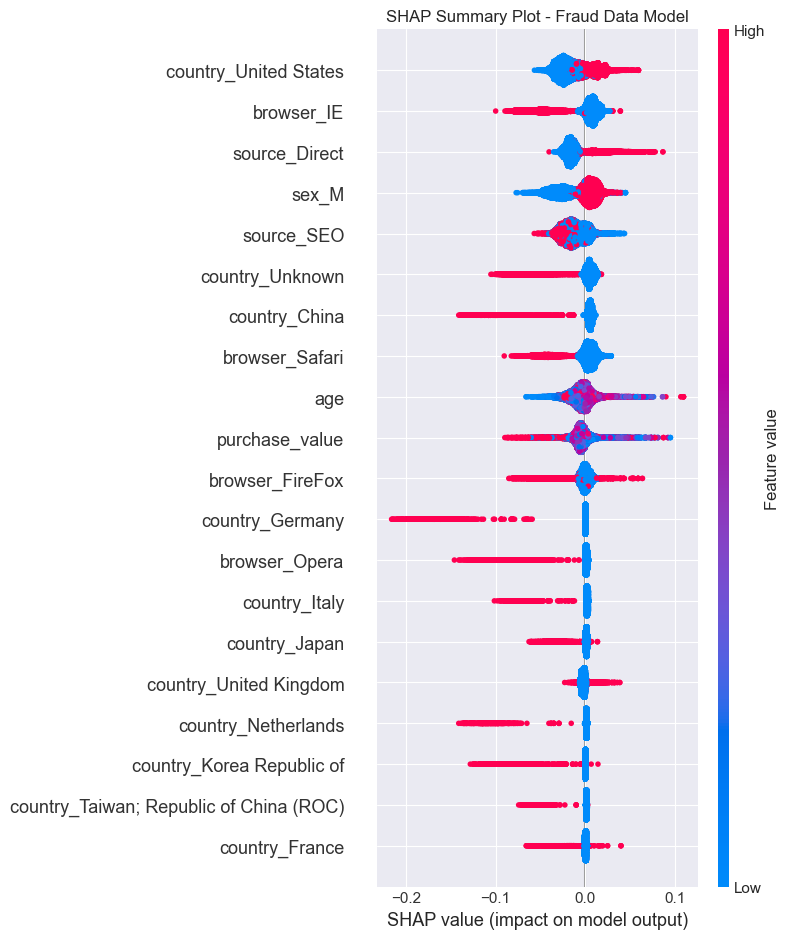


Generating SHAP Force Plots for Fraud Data Model...

Processing true_positive (index 29)...


<Figure size 2000x300 with 0 Axes>

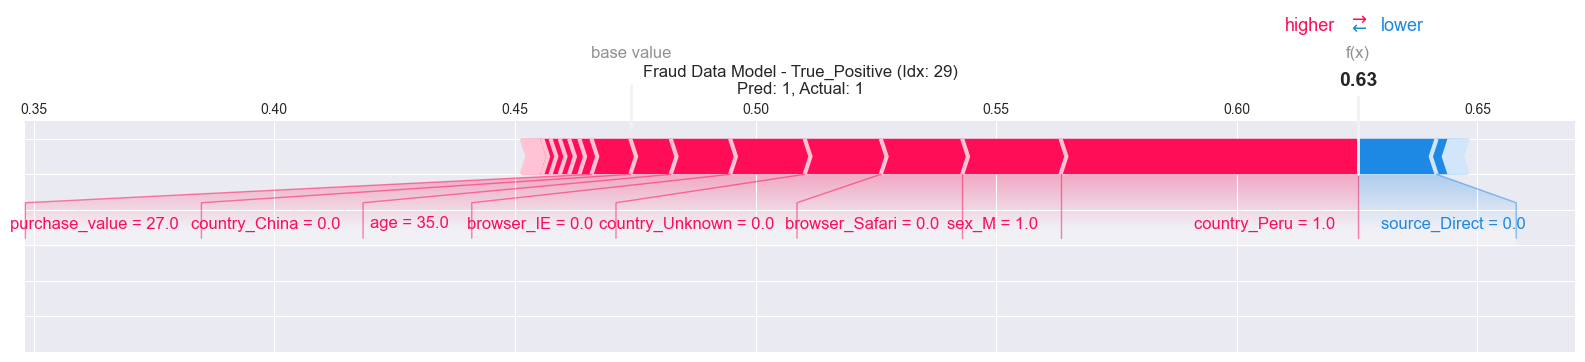

Top 5 Contributors:
        feature  shap_value  feature_value
   country_Peru    0.061838            1.0
          sex_M    0.020440            1.0
 browser_Safari    0.016917            0.0
  source_Direct   -0.016302            0.0
country_Unknown    0.015823            0.0

Processing false_positive (index 4)...


<Figure size 2000x300 with 0 Axes>

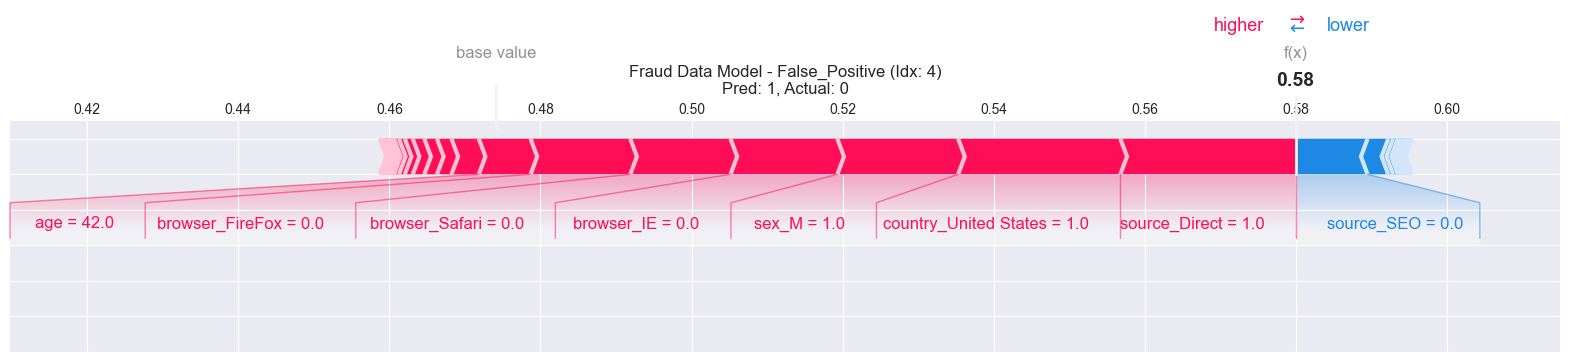

Top 5 Contributors:
              feature  shap_value  feature_value
        source_Direct    0.023184            1.0
country_United States    0.021458            1.0
                sex_M    0.015989            1.0
           browser_IE    0.014136            0.0
       browser_Safari    0.013262            0.0

Processing false_negative (index 2)...


<Figure size 2000x300 with 0 Axes>

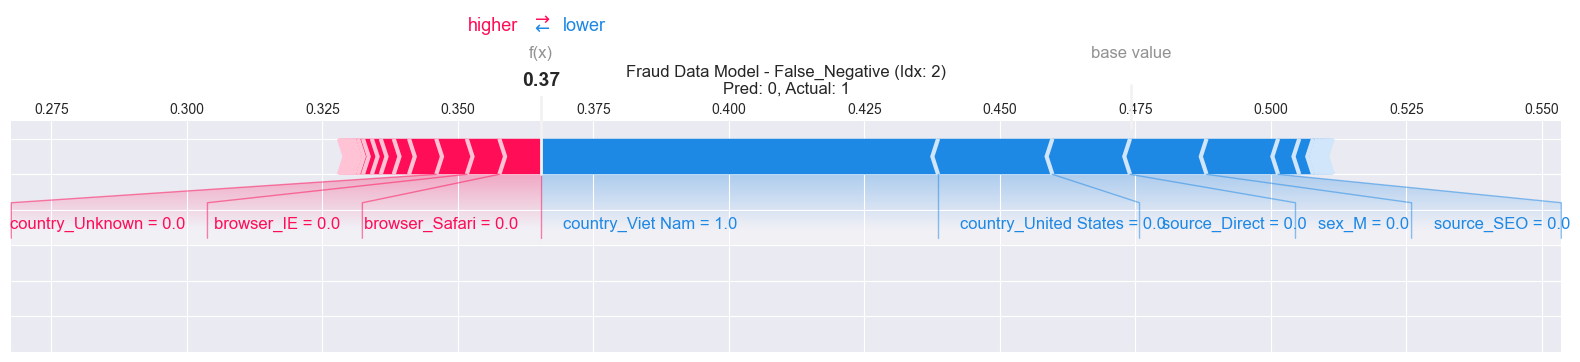

Top 5 Contributors:
              feature  shap_value  feature_value
     country_Viet Nam   -0.073303            1.0
country_United States   -0.021087            0.0
        source_Direct   -0.014328            0.0
                sex_M   -0.014118            0.0
           source_SEO   -0.013205            0.0

Comparing Importance: Fraud Data Model

TOP 5 DRIVERS: Fraud Data Model
country_United States: 7820 positive effects, 22403 negative effects
browser_IE: 21011 positive effects, 9212 negative effects
source_Direct: 4944 positive effects, 25279 negative effects
sex_M: 14207 positive effects, 16016 negative effects
source_SEO: 5716 positive effects, 24507 negative effects

BUSINESS RECOMMENDATIONS: Fraud Data Model
1. Monitor country_United States, browser_IE, source_Direct for anomalous spikes.
2. Trigger step-up auth when country_United States values deviate from user history.


In [9]:
analyzer1 = mx.analyze_fraud_data_model(
    model=model_fraud_data,
    X_train=X_train_fraudData_smote,
    X_test=X_test_fraudData,
    y_test=y_test_fraudData,
    feature_names=list(FraudData_Features)
)

[Parallel(n_jobs=22)]: Using backend ThreadingBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=22)]: Done 200 out of 200 | elapsed:    0.0s finished



FEATURE IMPORTANCE ANALYSIS: Random Forest Credit Card Data SMOTE



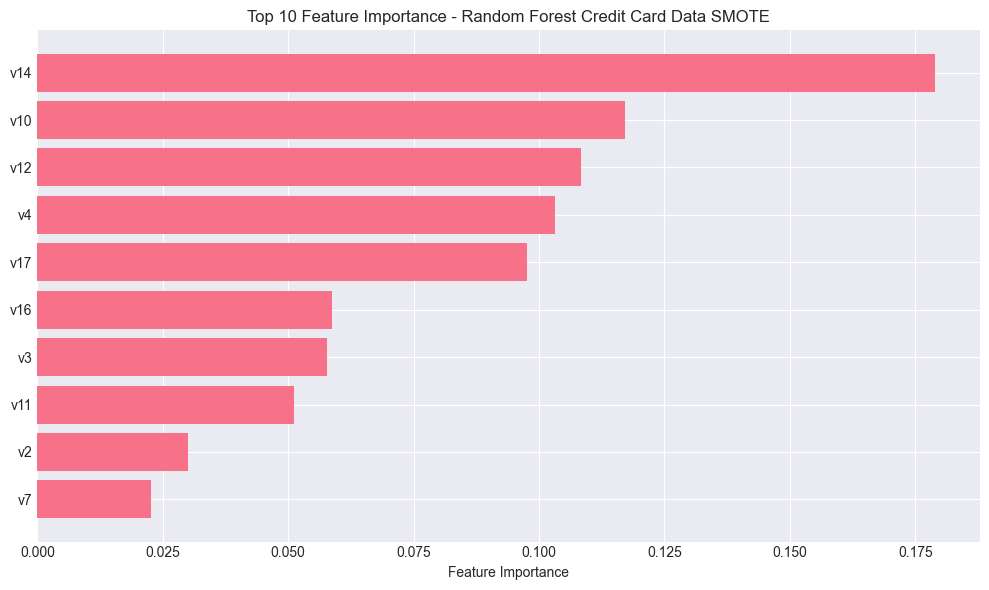


Computing SHAP values for Random Forest Credit Card Data SMOTE...


100%|===================| 113442/113492 [12:56<00:00]        

SHAP values computed successfully! Shape: (56746, 30)

Generating SHAP Summary Plot for Random Forest Credit Card Data SMOTE...


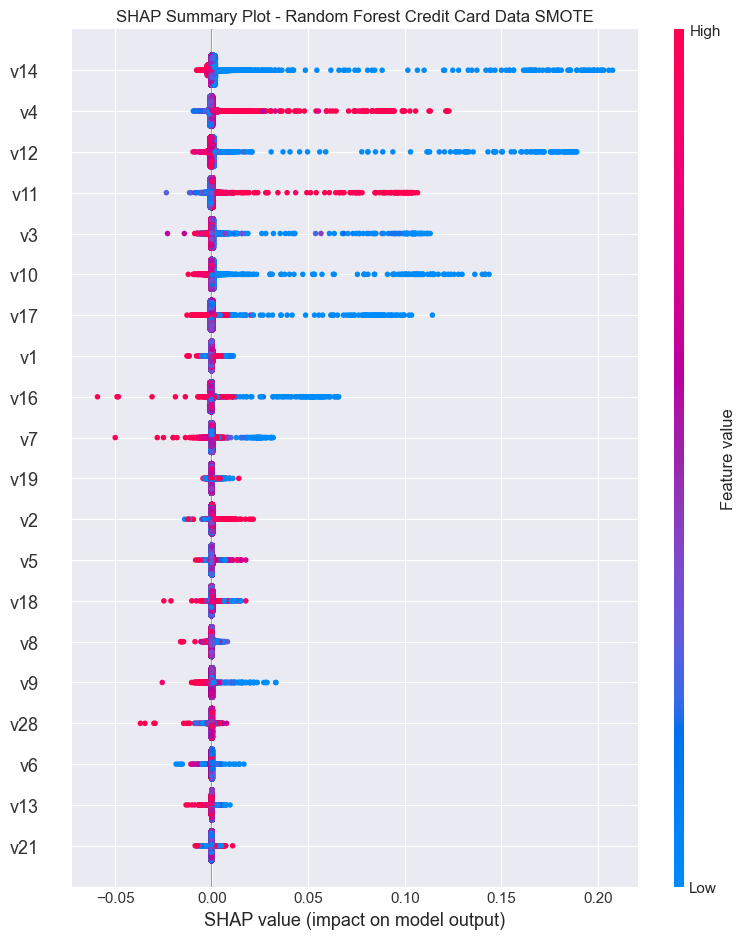


Generating SHAP Force Plots for Random Forest Credit Card Data SMOTE...

Processing true_positive (index 845)...


<Figure size 2000x300 with 0 Axes>

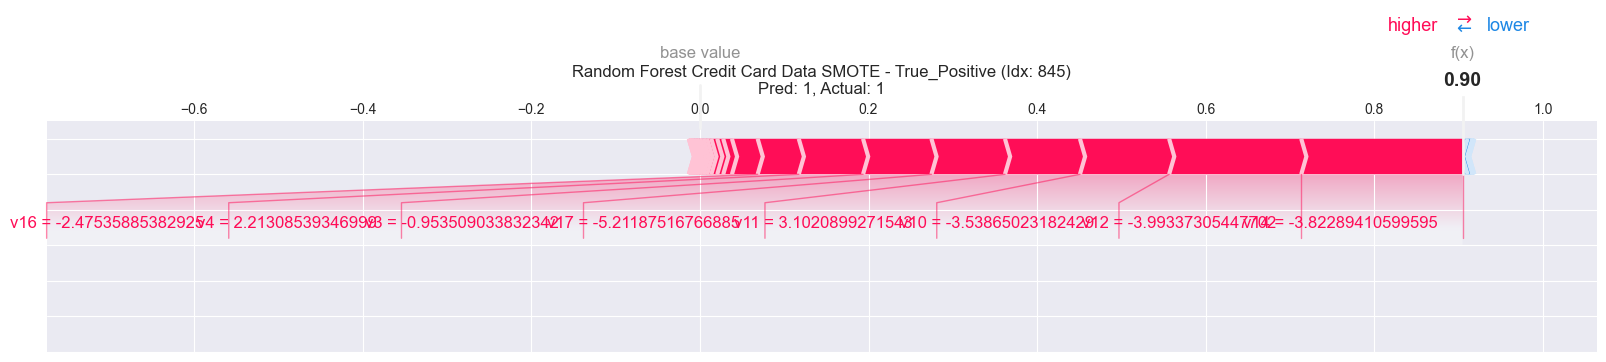

Top 5 Contributors:
feature  shap_value  feature_value
    v14    0.191437      -3.822894
    v12    0.156728      -3.993373
    v10    0.105790      -3.538650
    v11    0.088946       3.102090
    v17    0.087245      -5.211875

Processing false_positive (index 33810)...


<Figure size 2000x300 with 0 Axes>

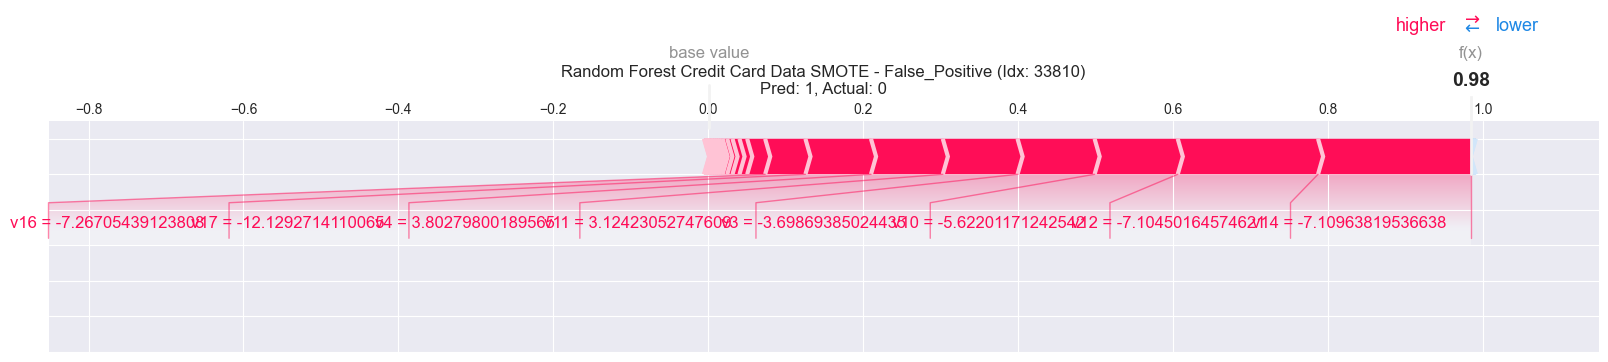

Top 5 Contributors:
feature  shap_value  feature_value
    v14    0.197519      -7.109638
    v12    0.181116      -7.104502
    v10    0.107335      -5.622012
     v3    0.099496      -3.698694
    v11    0.096494       3.124231

Processing false_negative (index 1784)...


<Figure size 2000x300 with 0 Axes>

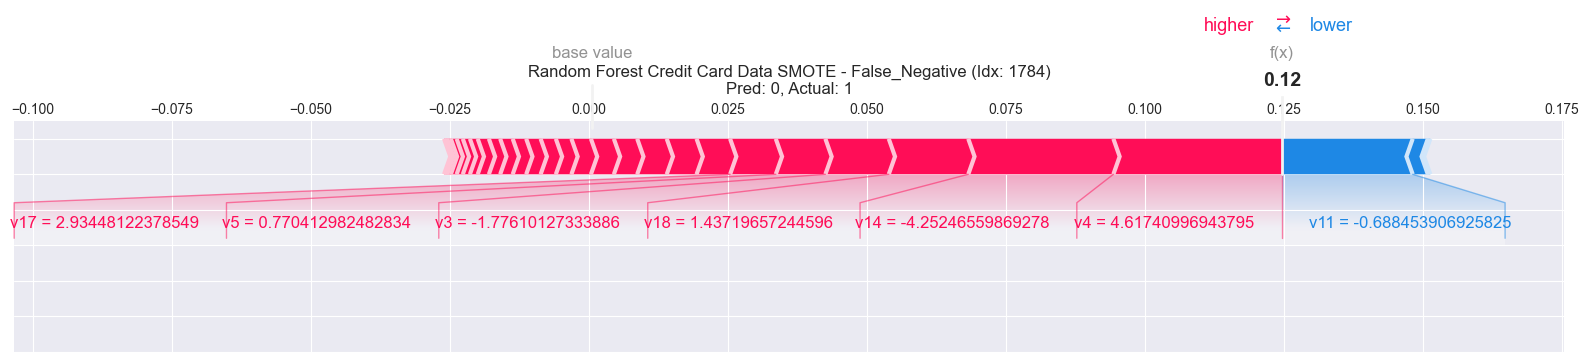

Top 5 Contributors:
feature  shap_value  feature_value
     v4    0.030320       4.617410
    v14    0.026099      -4.252466
    v11   -0.023514      -0.688454
    v18    0.014302       1.437197
     v3    0.011397      -1.776101

Comparing Importance: Random Forest Credit Card Data SMOTE

TOP 5 DRIVERS: Random Forest Credit Card Data SMOTE
v14: 12974 positive effects, 43772 negative effects
v4: 14798 positive effects, 41948 negative effects
v12: 14938 positive effects, 41808 negative effects
v11: 19444 positive effects, 37302 negative effects
v3: 25416 positive effects, 31330 negative effects

BUSINESS RECOMMENDATIONS: Random Forest Credit Card Data SMOTE
1. Monitor v14, v4, v12 for anomalous spikes.
2. Trigger step-up auth when v14 values deviate from user history.


In [9]:
analyzer2 = mx.analyze_credit_card_model(
    model=model_credit_card,
    X_train=X_train_creditCard,
    X_test=X_test_creditCard,
    y_test=y_test_creditCard,
    feature_names=CreditCard_Features
)